# ![scikit-learn](https://img.shields.io/badge/scikit--learn-%23F7931E.svg?style=for-the-badge&logo=scikit-learn&logoColor=white) **SUPPORT VECTOR MACHINES - EXERCISES**

---

## **SETUP:**

In [2]:
# Common libraries.
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# Default settings for matplotlib.
plt.rc("font", size=14)
plt.rc("axes", labelsize=14, titlesize=14)
plt.rc("legend", fontsize=14)
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)
plt.rc("grid", linestyle="dotted")
plt.rc("axes", grid=True)

---

## **EXERCISE 01:**

_Exercise: Train a `LinearSVC` on a linearly separable dataset. Then train an `SVC` and a `SGDClassifier` on the same dataset. See if you can get them to produce roughly the same model._

In [3]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values  # type: ignore
y = iris.target  # type: ignore

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]


Now let's build and train 3 models:
* Remember that `LinearSVC` uses `loss="squared_hinge"` by default, so if we want all 3 models to produce similar results, we need to set `loss="hinge"`.
* Also, the `SVC` class uses an RBF kernel by default, so we need to set `kernel="linear"` to get similar results as the other two models.
* Lastly, the `SGDClassifier` class does not have a `C` hyperparameter, but it has another regularization hyperparameter called `alpha`, so we can tweak it to get similar results as the other two models.

In [4]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 0.05

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf = LinearSVC(loss="hinge", C=C).fit(X_scaled, y)
svc_clf = SVC(kernel="linear", C=C).fit(X_scaled, y)
sgd_clf = SGDClassifier(alpha=alpha).fit(X_scaled, y)


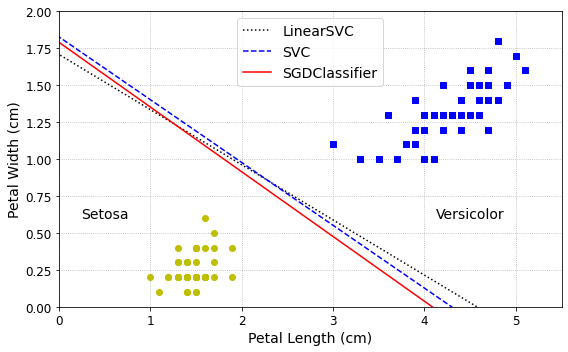

In [5]:
def compute_decision_boundary(model):
    # w1*x1 + w2*x2 + b = 0   =>   x2 = -w1*x1/w2 - b/w2
    w = -model.coef_[0, 0] / model.coef_[0, 1]
    b = -model.intercept_[0] / model.coef_[0, 1]
    return scaler.inverse_transform([[-10, -10 * w + b], [10, 10 * w + b]])

lin_line = compute_decision_boundary(lin_clf)
svc_line = compute_decision_boundary(svc_clf)
sgd_line = compute_decision_boundary(sgd_clf)

plt.figure(figsize=(8, 5))
plt.plot(lin_line[:, 0], lin_line[:, 1], "k:", label="LinearSVC")
plt.plot(svc_line[:, 0], svc_line[:, 1], "b--", label="SVC")
plt.plot(sgd_line[:, 0], sgd_line[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.text(0.5, 0.6, "Setosa", fontsize=14, ha="center")
plt.text(4.5, 0.6, "Versicolor", fontsize=14, ha="center")
plt.legend(loc="upper center")
plt.axis([0, 5.5, 0, 2])
plt.tight_layout()
plt.show()

---

## **EXERCISE 02:**

_Exercise: Train an SVM classifier on the Wine dataset, which you can load using `sklearn.datasets.load_wine()`. This dataset contains the chemical analysis of 178 wine samples produced by 3 different cultivators: the goal is to train a classification model capable of predicting the cultivator based on the wine's chemical analysis. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 3 classes. What accuracy can you reach?_

In [6]:
from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)

In [7]:
wine.data.head()  # type: ignore

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [8]:
wine.target  # type: ignore

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int32

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, random_state=42  # type: ignore
)

In [10]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

lin_clf = make_pipeline(StandardScaler(), LinearSVC(random_state=42))
lin_clf_scores = cross_val_score(lin_clf, X_train, y_train, cv=10, scoring="accuracy")
lin_clf_scores.mean()


0.9846153846153847

In [11]:
from sklearn.svm import SVC

svm_clf = make_pipeline(StandardScaler(), SVC(random_state=42))
svm_clf_scores = cross_val_score(svm_clf, X_train, y_train, cv=10, scoring="accuracy")
svm_clf_scores.mean()

0.9692307692307693

In [12]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_dst = {
    "svc__gamma": reciprocal(0.001, 1),
    "svc__C": uniform(1, 100),
}

rnd_search = RandomizedSearchCV(svm_clf, param_dst, cv=5, random_state=42,
                                scoring="accuracy", n_iter=100)
rnd_search.fit(X_train, y_train)
rnd_search.best_score_

0.9925925925925926

In [13]:
rnd_search.best_params_

{'svc__C': 62.18528947223795, 'svc__gamma': 0.00262108787826544}

In [14]:
from sklearn.metrics import accuracy_score

y_pred = rnd_search.predict(X_test)  # type: ignore
accuracy_score(y_test, y_pred)


0.9777777777777777

---

## **EXERCISE 03:**

_Exercise: Train and fine-tune an SVM regressor on the California housing dataset. You can use the original dataset rather than the tweaked version we used in Chapter 2. The original dataset can be fetched using `sklearn.datasets.fetch_california_housing()`. The targets represent hundreds of thousands of dollars. Since there are over 20,000 instances, SVMs can be slow, so for hyperparameter tuning you should use much less instances (e.g., 2,000), to test many more hyperparameter combinations. What is your best model's RMSE?_

In [15]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)

In [16]:
housing.data.head()  # type: ignore

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [17]:
housing.target[:5]  # type: ignore

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

Results represent hundreds of thousands of dollars so for example 4.526 = $452,600

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    housing.data, housing.target, test_size=0.2, random_state=42  # type: ignore
)

In [19]:
# Let's see how LinearSVR handles with that.
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

lin_svr = make_pipeline(StandardScaler(), LinearSVR(random_state=42, max_iter=5000))
lin_svr_rmses = -cross_val_score(lin_svr, X_train[:5000], y_train[:5000], cv=10,
                                 scoring="neg_root_mean_squared_error")
lin_svr_rmses

array([0.67990817, 0.67334701, 0.62986082, 0.70551324, 0.72840787,
       0.7482489 , 2.5456633 , 0.79886233, 0.62268826, 0.70770077])

In [20]:
from sklearn.metrics import mean_squared_error

lin_svr.fit(X_train, y_train)
y_pred = lin_svr.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse


0.7659274332661788

This means root mean squared error close to $77,000.

In [21]:
# Let's see kernelized SVR.
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

svm_reg = make_pipeline(StandardScaler(), SVR())

param_dst = {
    "svr__gamma": reciprocal(0.001, 0.1),
    "svr__C": uniform(1, 10),
    "svr__kernel": ["poly", "rbf"],
}

rnd_search = RandomizedSearchCV(svm_reg, param_dst, n_iter=100, cv=3, random_state=42,
                                scoring="neg_root_mean_squared_error")
rnd_search.fit(X_train[:2000], y_train[:2000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svr', SVR())]),
                   n_iter=100,
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FF93DE60B0>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FF93DE66E0>,
                                        'svr__kernel': ['poly', 'rbf']},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [23]:
best_rmse = -rnd_search.best_score_
best_rmse

0.5611587181070788

In [25]:
rnd_search.best_params_

{'svr__C': 6.722924691708383,
 'svr__gamma': 0.09134045432215852,
 'svr__kernel': 'rbf'}

In [26]:
cross_val_rmses = -cross_val_score(rnd_search.best_estimator_, X_train, y_train, 
                                   scoring="neg_root_mean_squared_error", cv=3)
cross_val_rmses

array([0.58604919, 0.56336716, 0.5854363 ])

In [27]:
y_pred = rnd_search.best_estimator_.predict(X_test)  # type: ignore
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
test_rmse

0.5825337220313012